# **Import Libraries**


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# **import dataset**

In [ ]:
df = pd.read_csv('/content/Data - Data.csv')
df

,Country,Age,Salary,Purchased
0,France,44.0,72000.0,No
1,Spain,27.0,48000.0,Yes
2,Germany,30.0,54000.0,No
3,Spain,38.0,61000.0,No
4,Germany,40.0,NaN,Yes
5,France,35.0,58000.0,Yes
6,Spain,NaN,52000.0,No
7,France,48.0,79000.0,Yes
8,Germany,50.0,83000.0,No
9,France,37.0,67000.0,Yes


# **selecting dependent and independent values**

In [ ]:
X = df.iloc[:, 0:3].values
y = df.iloc[:, -1].values

In [ ]:
X

array([['France', 44.0, 72000.0],
       ['Spain', 27.0, 48000.0],
       ['Germany', 30.0, 54000.0],
       ['Spain', 38.0, 61000.0],
       ['Germany', 40.0, nan],
       ['France', 35.0, 58000.0],
       ['Spain', nan, 52000.0],
       ['France', 48.0, 79000.0],
       ['Germany', 50.0, 83000.0],
       ['France', 37.0, 67000.0]], dtype=object)

In [ ]:
y

array(['No', 'Yes', 'No', 'No', 'Yes', 'Yes', 'No', 'Yes', 'No', 'Yes'],
      dtype=object)

# **Manage missing data**
1. mean 2. median 3. mode(most frequent) and 4. constant
# strategy = mean


In [ ]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
imputer.fit(X[:, 1:3])
X[:, 1:3] = imputer.transform(X[:, 1:3])

In [ ]:
X

array([['France', 44.0, 72000.0],
       ['Spain', 27.0, 48000.0],
       ['Germany', 30.0, 54000.0],
       ['Spain', 38.0, 61000.0],
       ['Germany', 40.0, 63777.77777777778],
       ['France', 35.0, 58000.0],
       ['Spain', 38.77777777777778, 52000.0],
       ['France', 48.0, 79000.0],
       ['Germany', 50.0, 83000.0],
       ['France', 37.0, 67000.0]], dtype=object)

# **Manage missing data**
# strategy = median


In [ ]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values=np.nan, strategy='median')  # result is wrong. its still showing mean.
imputer.fit(X[:, 1:3])
X[:, 1:3] = imputer.transform(X[:, 1:3])

In [ ]:
X

array([[1.0, 0.0, 0.0, 44.0, 72000.0],
       [0.0, 0.0, 1.0, 27.0, 48000.0],
       [0.0, 1.0, 0.0, 30.0, 54000.0],
       [0.0, 0.0, 1.0, 38.0, 61000.0],
       [0.0, 1.0, 0.0, 40.0, 63777.77777777778],
       [1.0, 0.0, 0.0, 35.0, 58000.0],
       [0.0, 0.0, 1.0, 38.77777777777778, 52000.0],
       [1.0, 0.0, 0.0, 48.0, 79000.0],
       [0.0, 1.0, 0.0, 50.0, 83000.0],
       [1.0, 0.0, 0.0, 37.0, 67000.0]], dtype=object)

# **Encoding Categorical Data**
# Non Numeric to Numeric data

In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [0])], remainder='passthrough')
X = np.array(ct.fit_transform(X))

In [ ]:
X

array([[1.0, 0.0, 0.0, 44.0, 72000.0],
       [0.0, 0.0, 1.0, 27.0, 48000.0],
       [0.0, 1.0, 0.0, 30.0, 54000.0],
       [0.0, 0.0, 1.0, 38.0, 61000.0],
       [0.0, 1.0, 0.0, 40.0, 63777.77777777778],
       [1.0, 0.0, 0.0, 35.0, 58000.0],
       [0.0, 0.0, 1.0, 38.77777777777778, 52000.0],
       [1.0, 0.0, 0.0, 48.0, 79000.0],
       [0.0, 1.0, 0.0, 50.0, 83000.0],
       [1.0, 0.0, 0.0, 37.0, 67000.0]], dtype=object)

# **Encoding the Dependent Variable**

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(y)

# **Splitting the dataset into the Training set and Test**

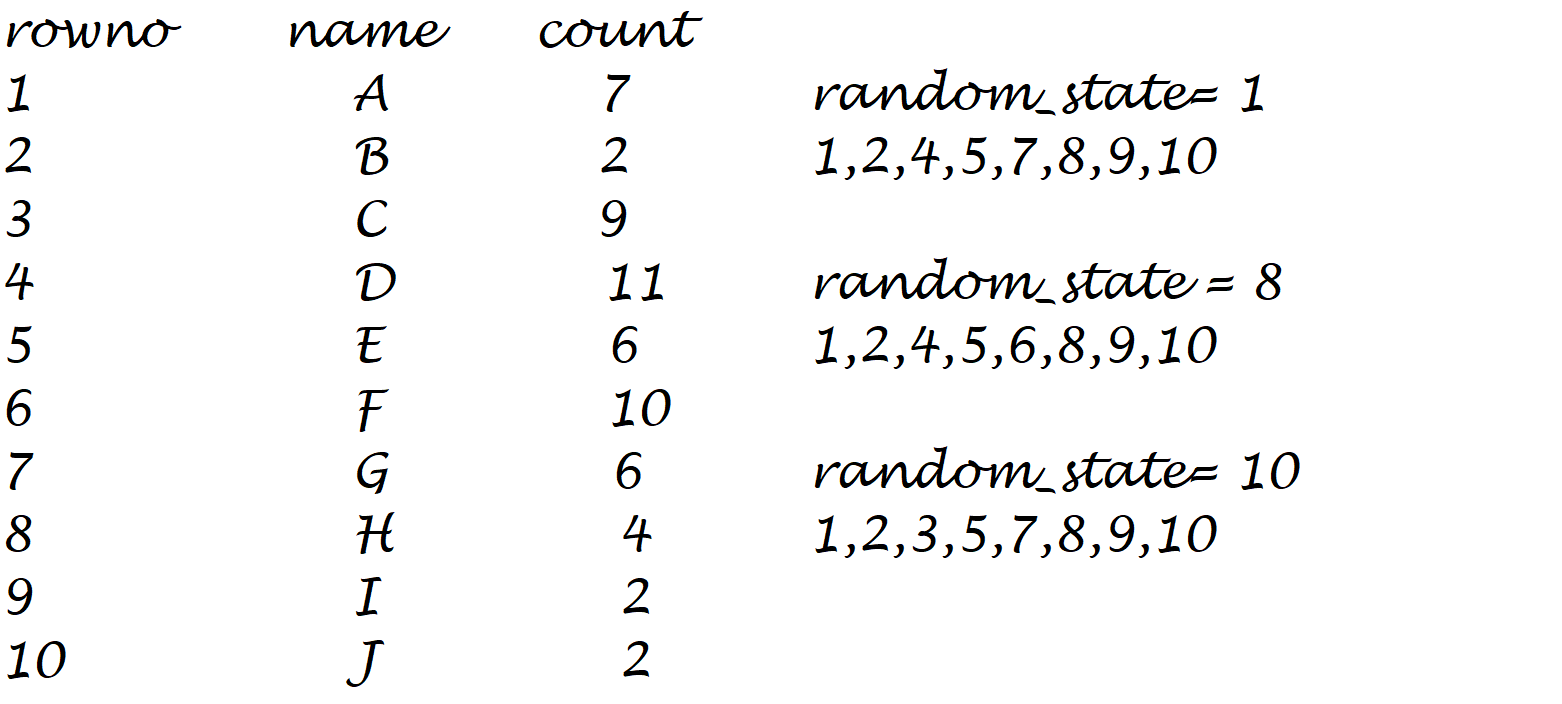

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [ ]:
X_train, X_test, y_train, y_test

(array([[0.0, 1.0, 0.0, 40.0, 63777.77777777778],
        [1.0, 0.0, 0.0, 37.0, 67000.0],
        [0.0, 0.0, 1.0, 27.0, 48000.0],
        [0.0, 0.0, 1.0, 38.77777777777778, 52000.0],
        [1.0, 0.0, 0.0, 48.0, 79000.0],
        [0.0, 0.0, 1.0, 38.0, 61000.0],
        [1.0, 0.0, 0.0, 44.0, 72000.0],
        [1.0, 0.0, 0.0, 35.0, 58000.0]], dtype=object),
 array([[0.0, 1.0, 0.0, 30.0, 54000.0],
        [0.0, 1.0, 0.0, 50.0, 83000.0]], dtype=object),
 array([1, 1, 1, 0, 1, 0, 0, 1]),
 array([0, 0]))

# **Feature Selection**

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train[:, 3:] = sc.fit_transform(X_train[:, 3:])
X_test[:, 3:] = sc.transform(X_test[:, 3:])

In [ ]:
X_train

array([[0.0, 1.0, 0.0, 0.2630675731713538, 0.1238147854838185],
       [1.0, 0.0, 0.0, -0.25350147960148617, 0.4617563176278856],
       [0.0, 0.0, 1.0, -1.9753983221776195, -1.5309334063940294],
       [0.0, 0.0, 1.0, 0.05261351463427101, -1.1114197802841526],
       [1.0, 0.0, 0.0, 1.6405850472322605, 1.7202971959575162],
       [0.0, 0.0, 1.0, -0.08131179534387283, -0.16751412153692966],
       [1.0, 0.0, 0.0, 0.9518263102018072, 0.9861483502652316],
       [1.0, 0.0, 0.0, -0.5978808481167128, -0.48214934111933727]],
      dtype=object)